In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

<ipython-input-2-068180dff602>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [ ]:
df=pd.read_csv('/content/swiggy.csv')

In [ ]:
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


In [ ]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [ ]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [ ]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


**Restaurant Comparison**: **bold text** Compare different restaurants based on their attributes such as price, ratings, and food type.

In [ ]:
columns_to_compare = ['Restaurant', 'Price', 'Avg ratings', 'Food type']


restaurant_comparison = df.groupby('Restaurant')[columns_to_compare].agg({
    'Price': 'mean',
    'Avg ratings': 'mean',
    'Food type': 'first',
    'Restaurant': 'count'})

restaurant_comparison.rename(columns={
    'Price': 'Average Price',
    'Avg ratings': 'Average Ratings',
    'Food type': 'Food Type',
    'Restaurant': 'Total Occurrences'
}, inplace=True)

restaurant_comparison.sort_values(by='Average Ratings', ascending=False, inplace=True)

print(restaurant_comparison)


                                      Average Price  Average Ratings  \
Restaurant                                                             
Diamond Market Pizza Jp                       600.0              5.0   
Get In My Belly                               500.0              5.0   
Splurge - Thickshakes And Milkshakes          300.0              5.0   
Snaxx                                         500.0              5.0   
Nivala Apka Apna                              200.0              5.0   
...                                             ...              ...   
Diwan Food Court                              300.0              2.3   
Frosty Den                                    200.0              2.2   
The Shawarma Daddy                            150.0              2.2   
Hyderabadi Biryani House                      150.0              2.2   
Golden Dragon Chinese & Momo                  300.0              2.0   

                                                               

In [ ]:
df1=df.sample(10)
df1

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
2975,298393,Raja Bazar,Kolkata,Delisha Biryani House,200.0,3.5,20,Biryani,Opposite Hind Mahal,42
8076,342814,Kuber Nagar,Ahmedabad,Cake Adda,100.0,2.9,80,"Bakery,Desserts,Combo,Indian",Naroda,80
6773,37343,Banjara Hills,Hyderabad,Just Parantha,200.0,4.2,1000,North Indian,Road No 12 Banjarahills,48
3839,354889,Kavadiguda,Hyderabad,Bismillah Hotel,100.0,3.4,100,"South Indian,Thalis,Beverages",Nallakunta & Vidyanagar,40
4652,392211,Himayath Nagar,Hyderabad,Nice Day Baquares And Ice Creams,100.0,2.9,80,Chinese,Himayath Nagar,38
534,21785,Vadapalani,Chennai,The Waterfall Restaurant,500.0,3.9,50,"Indian,Chinese,Andhra,Tandoor",Vadapalani,80
8044,333038,Topsia,Kolkata,Cake N Cooki,300.0,2.9,80,Bakery,Tangra,78
3271,320326,Egmore,Chennai,Grill Wagon,200.0,2.9,80,Indian,Nungambakkam,49
8187,382691,Camp,Pune,Gourmet Ice Cream Cakes By Baskin Robbins,250.0,2.9,80,"Desserts,Ice Cream,Bakery",Camp,36
5324,422664,Viman Nagar,Pune,Pizza Loca,350.0,2.9,80,"Pizzas,Pastas,Fast Food,Beverages",Viman Nagar,73


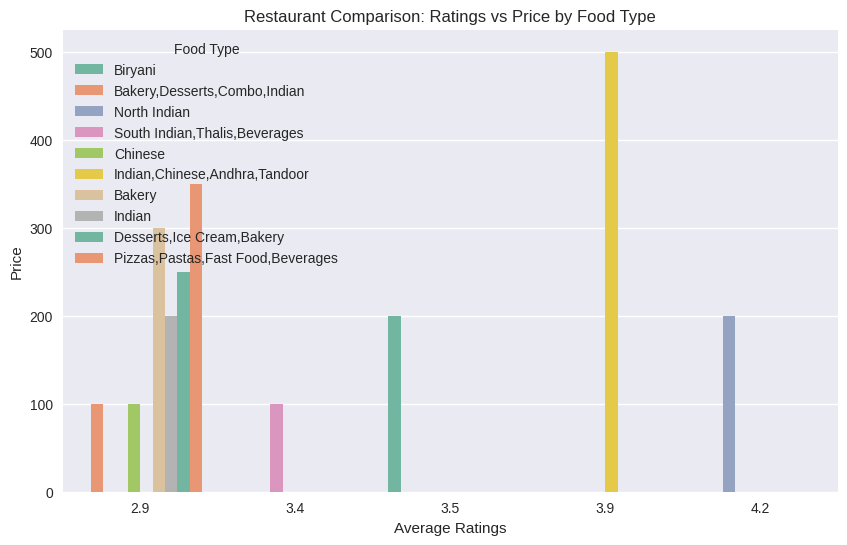

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Avg ratings', y='Price', hue='Food type', palette='Set2')
plt.title('Restaurant Comparison: Ratings vs Price by Food Type')
plt.xlabel('Average Ratings')
plt.ylabel('Price')
plt.legend(title='Food Type')
plt.show()


2. **Location Analysis**: Analyze restaurant distribution across different areas and cities.

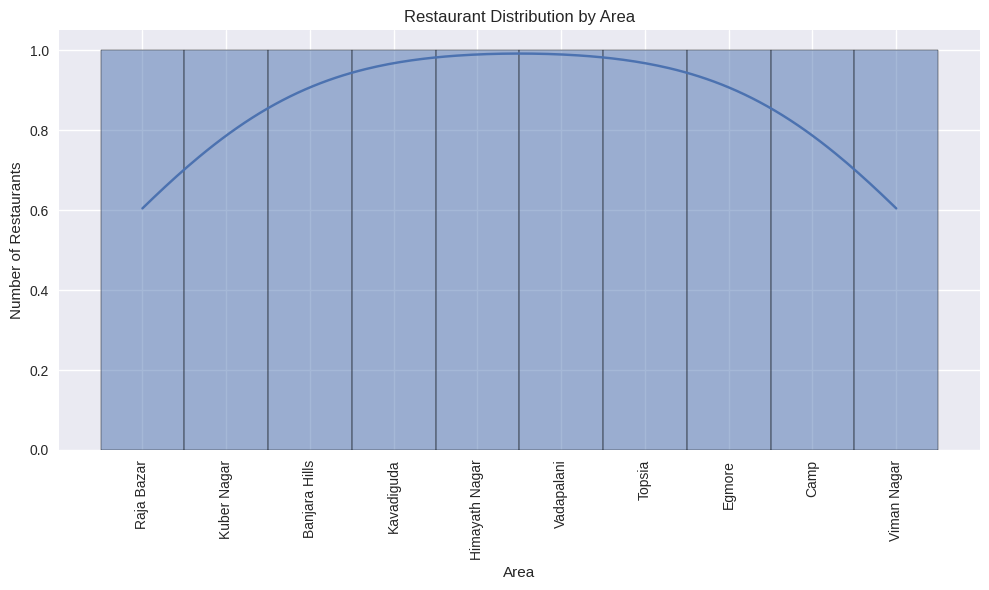

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Area', bins=len(df1['Area'].unique()), kde=True)
plt.xticks(rotation=90)
plt.title('Restaurant Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()


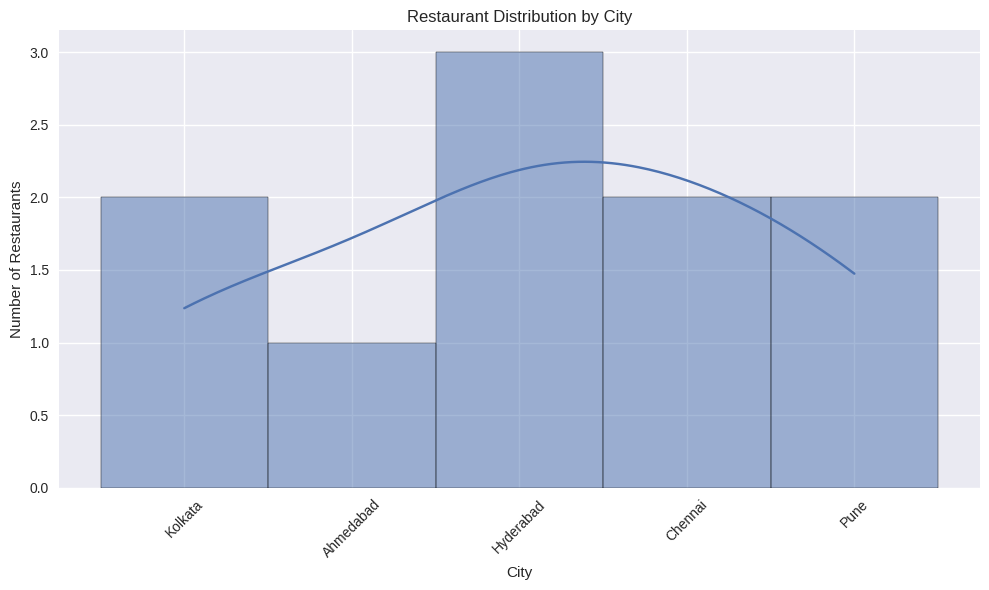

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='City', bins=len(df1['City'].unique()), kde=True)
plt.xticks(rotation=45)
plt.title('Restaurant Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

. **City Preferences**: Study customer preferences for restaurants in different cities.


# Create a box plot for customer preferences based on average ratings by city

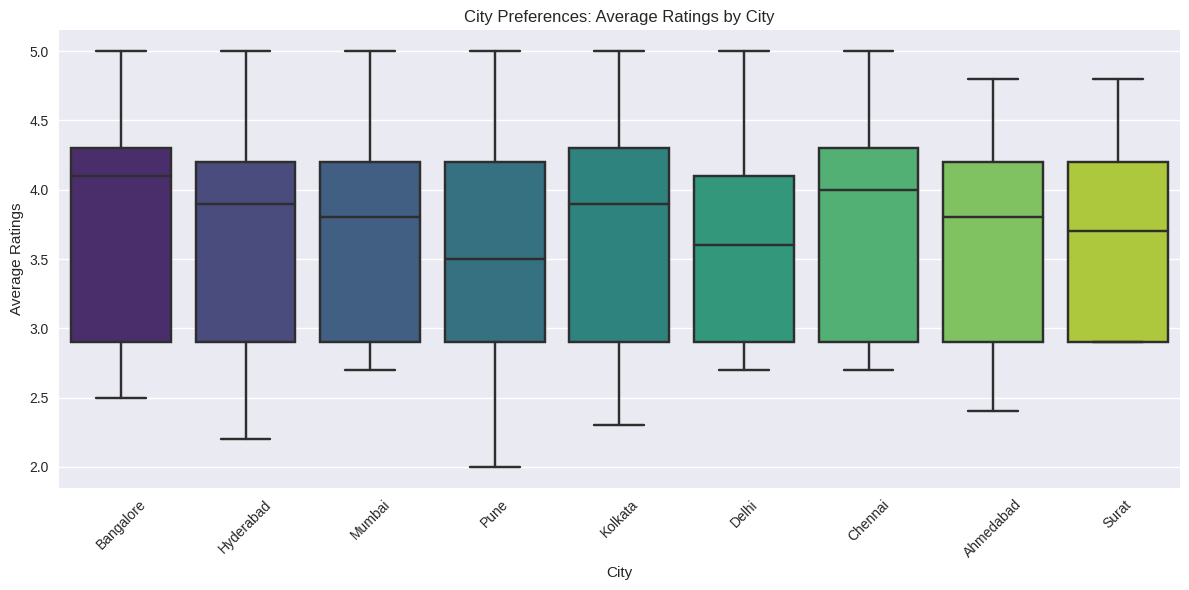

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='City', y='Avg ratings', palette='viridis')
plt.xticks(rotation=45)
plt.title('City Preferences: Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Ratings')
plt.tight_layout()
plt.show()




banglore has higest mean value

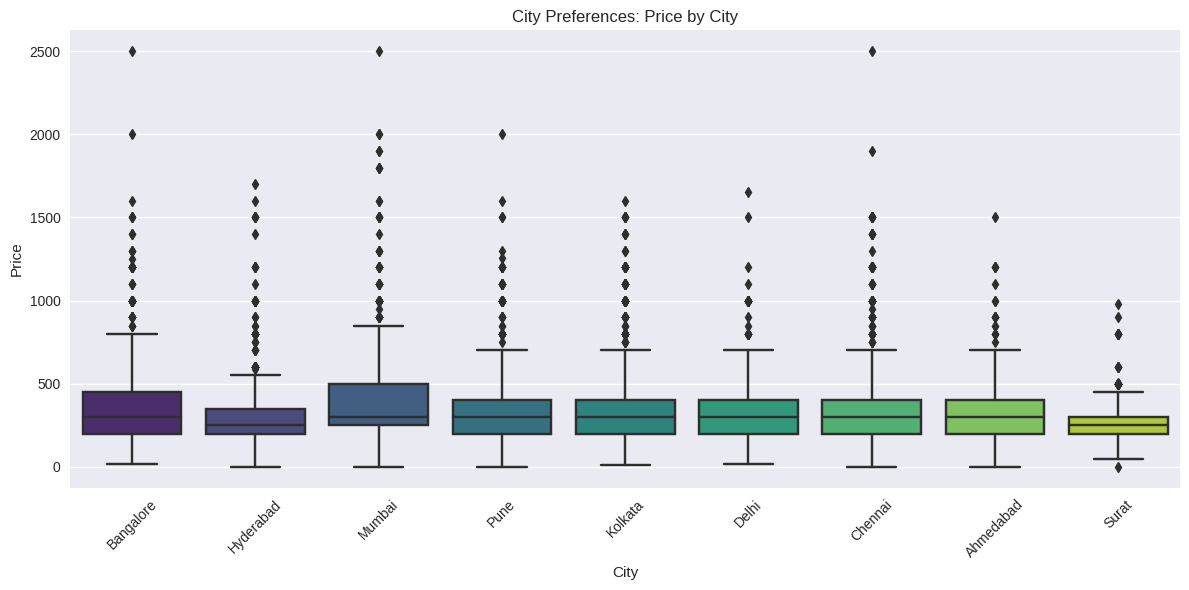

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='City', y='Price', palette='viridis')
plt.xticks(rotation=45)
plt.title('City Preferences: Price by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**Price Analysis**: Analyze the relationship between price range and customer ratings.

# Create a bar plot to analyze the relationship between price range and customer ratings

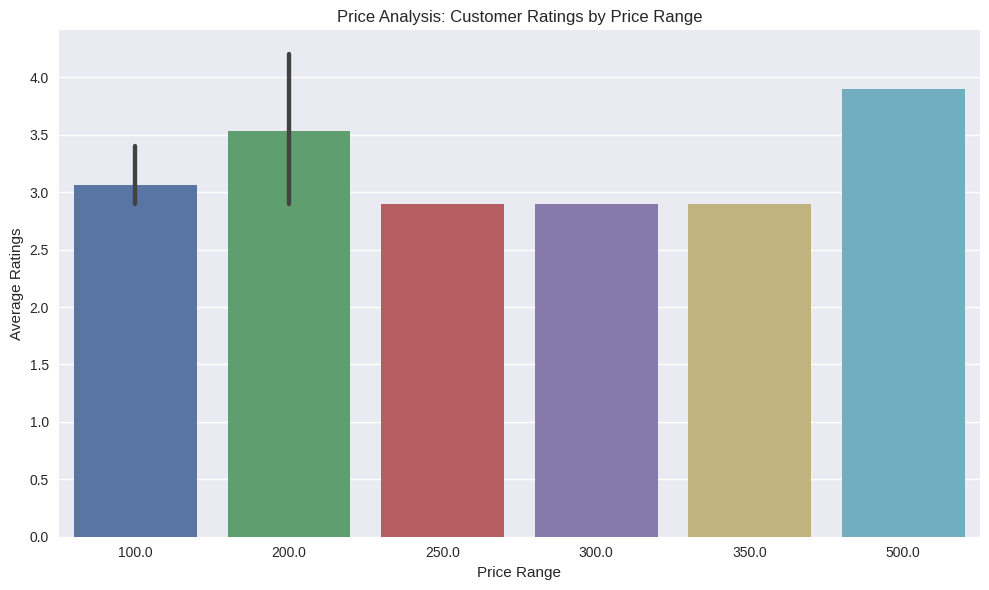

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Price', y='Avg ratings')
plt.title('Price Analysis: Customer Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Ratings')
plt.tight_layout()
plt.show()



5. **Cuisine Trends**: Study trends in customer preferences for different food types or cuisines.


# Create a bar plot to study trends in customer preferences for different food types

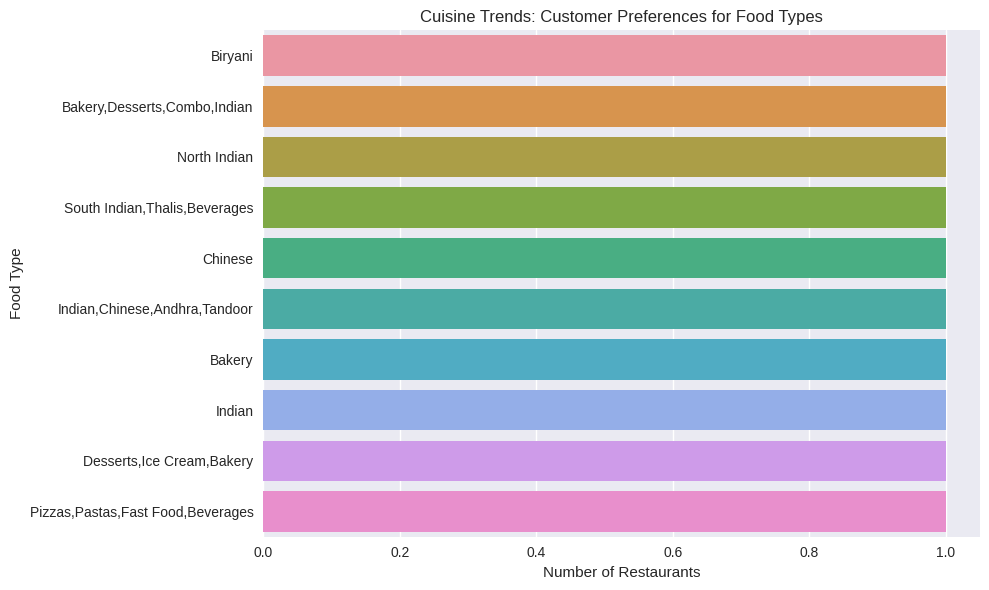

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, y='Food type', order=df1['Food type'].value_counts().index)
plt.title('Cuisine Trends: Customer Preferences for Food Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Food Type')
plt.tight_layout()
plt.show()


**Ratings Impact**: Analyze how average ratings and total ratings affect restaurant popularity.

# Create a scatter plot to analyze the impact of ratings on restaurant popularity

In [ ]:
df1.columns


Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [ ]:
avg_rating = df[df['Avg ratings'] >=4.5]
avg_rating

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
5,254,Indiranagar,Bangalore,Treat,800.0,4.5,100,"Mughlai,North Indian",100 Feet Road,56
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000.0,4.5,500,"Mexican,Beverages,Salads",Double Road,53
45,2811,Ashok Nagar,Bangalore,Art Of Delight,250.0,4.6,100,"Ice Cream,Desserts,Beverages",Residency Road,34
75,3369,Ashok Nagar,Bangalore,Truffles,450.0,4.5,1000,"American,Desserts,Continental,Italian",St. Marks Road,29
122,5172,Bandra Area,Mumbai,Theobroma,800.0,4.7,500,"Desserts,Bakery,Beverages",Bandra Area,40
...,...,...,...,...,...,...,...,...,...,...
8439,432094,Esplanade,Kolkata,Keventers Ice Creamery,300.0,5.0,20,"Ice Cream,Desserts",New Empire Cinema Kolkata,45
8490,440407,Lake Town,Kolkata,Hunger Twister,250.0,4.6,20,Chinese,Lake Town,74
8506,442032,Koramangala,Bangalore,Keventers Ice Creamery,200.0,4.9,20,"Ice Cream,Desserts",7Th Block,57
8523,444297,Vastrapur,Ahmedabad,Chup Chaap,200.0,4.8,20,"Indian,Tandoor,Beverages,North Indian,Chinese,...",Vastrapur,52


In [ ]:
df2=avg_rating

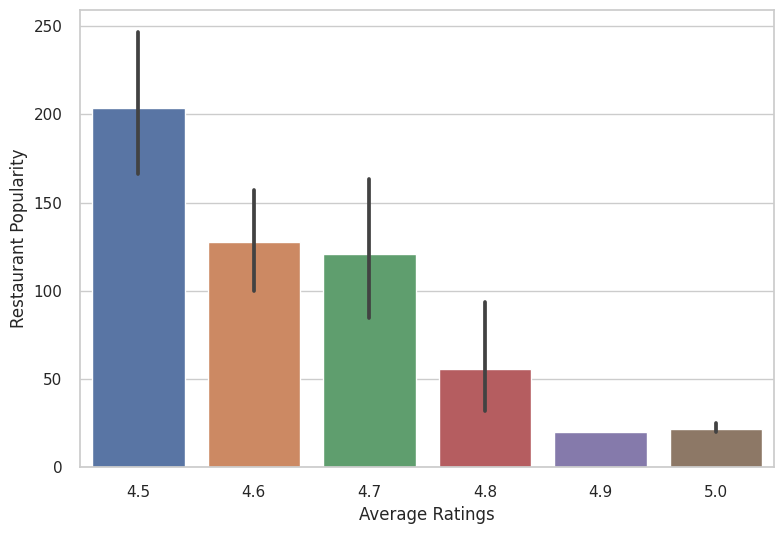

In [ ]:
# Create a joint plot to analyze the impact of ratings on restaurant popularity
sns.set_theme(style="whitegrid")
g = sns.barplot(data=df2, x='Avg ratings', y='Total ratings')
plt.subplots_adjust(top=0.9)
plt.xlabel('Average Ratings')
plt.ylabel('Restaurant Popularity')
plt.tight_layout()
plt.show()


 Study customer expectations for delivery time and its impact on restaurant choice.

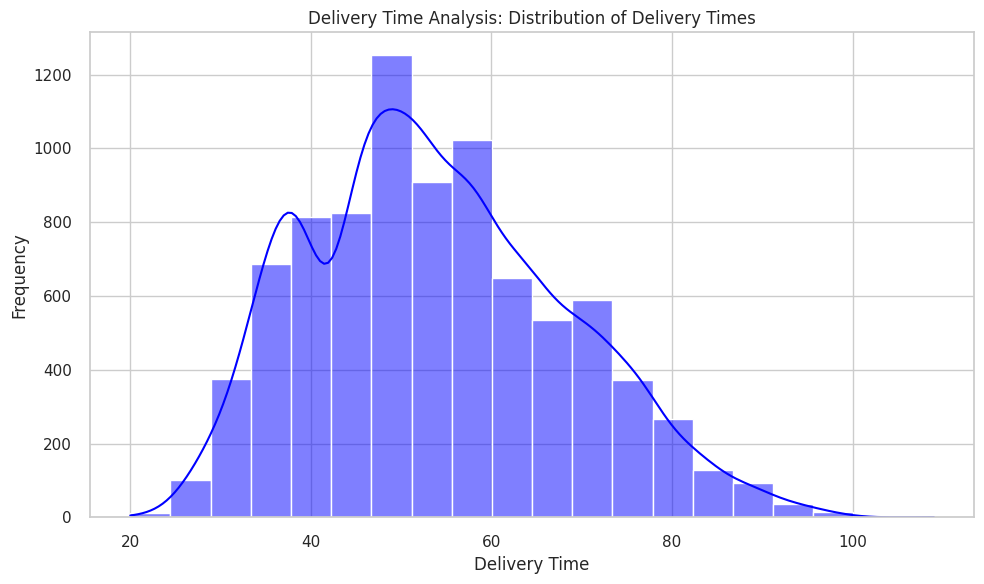

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Delivery time', bins=20, kde=True, color='blue')
plt.title('Delivery Time Analysis: Distribution of Delivery Times')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Create a scatter plot to analyze the impact of delivery time on ratings

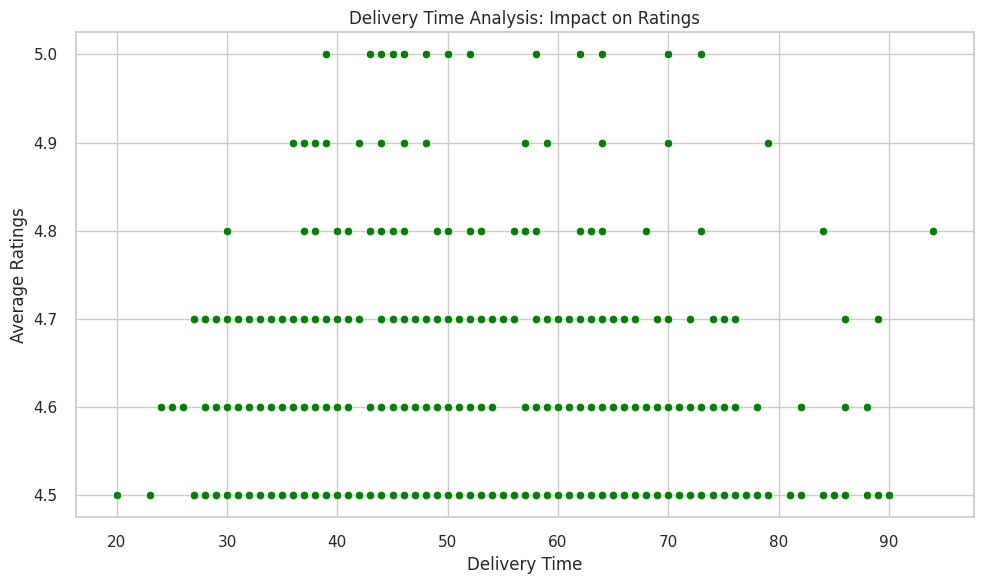

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Delivery time', y='Avg ratings', color='green')
plt.title('Delivery Time Analysis: Impact on Ratings')
plt.xlabel('Delivery Time')
plt.ylabel('Average Ratings')
plt.tight_layout()
plt.show()


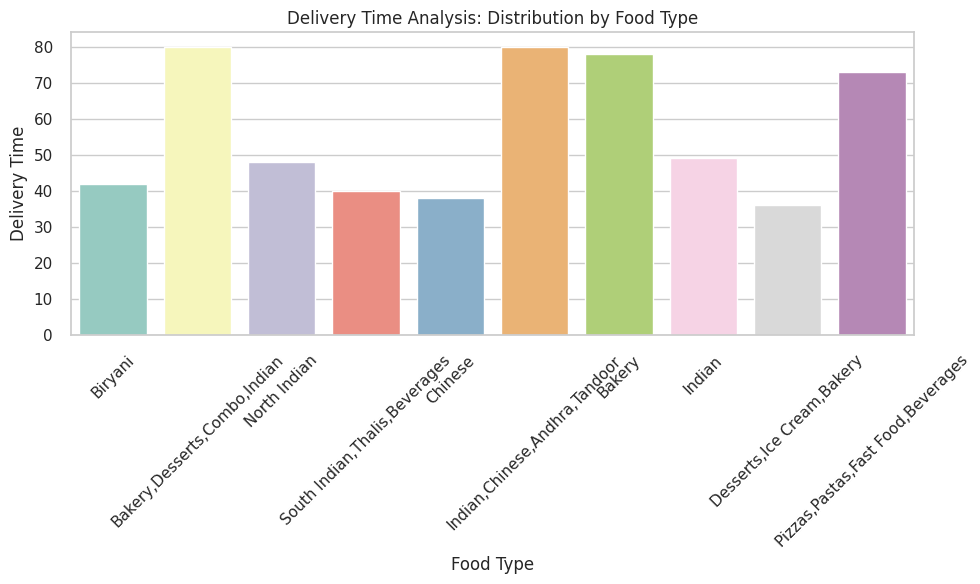

In [ ]:
# Create a box plot to analyze the distribution of delivery times by food type
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Food type', y='Delivery time', palette='Set3')
plt.xticks(rotation=45)
plt.title('Delivery Time Analysis: Distribution by Food Type')
plt.xlabel('Food Type')
plt.ylabel('Delivery Time')
plt.tight_layout()
plt.show()


 **Customer Segmentation**: Segment customers based on their preferences and analyze their impact on restaurant popularity

In [ ]:
df.columns


Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [ ]:
selected_features = ['Avg ratings', 'Price', 'Total ratings']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[selected_features])

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'Price': 'Average Price',
    'Avg ratings': '`Average Ratings`',
    'Food type': 'Food Type',
    'Restaurant': 'Total Occurrences'

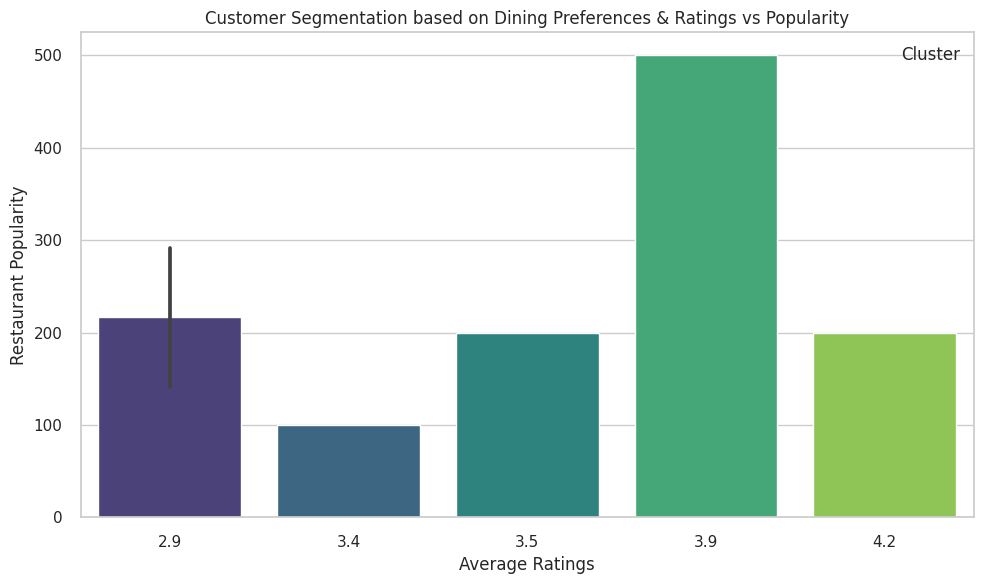

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Avg ratings', y='Price', palette='viridis')
plt.xlabel('Average Ratings')
plt.ylabel('Restaurant Popularity')
plt.title('Customer Segmentation based on Dining Preferences & Ratings vs Popularity')
plt.legend(title='Cluster', title_fontsize='12')
plt.tight_layout()
plt.show()

rating from 2 to 5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


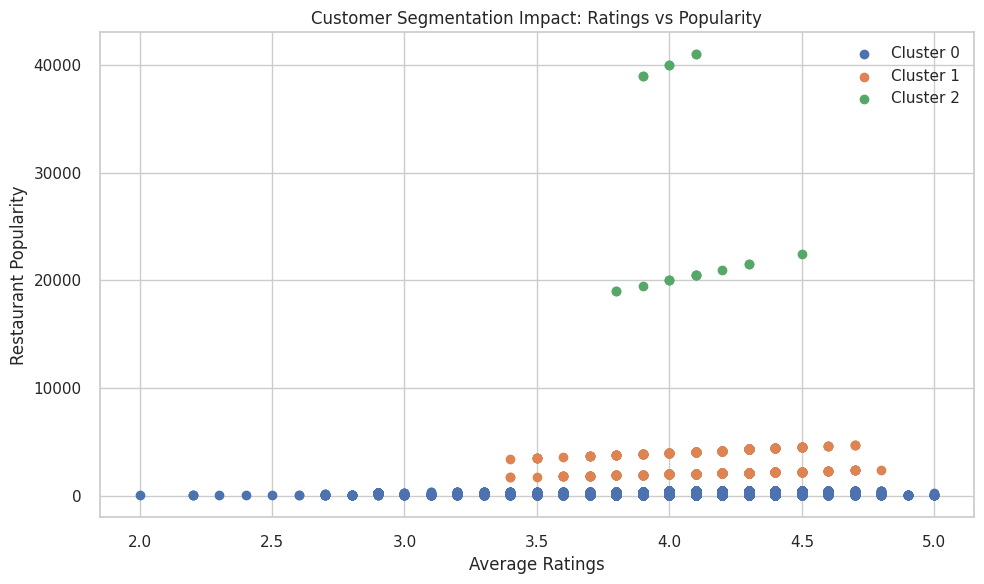

In [ ]:

X = df[['Avg ratings', 'Total ratings', 'Price']]

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Calculate popularity score based on average ratings and total ratings
df['Popularity'] = df['Avg ratings'] * df['Total ratings']

# Create a scatter plot to analyze the impact of customer segments on restaurant popularity
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Avg ratings'], cluster_data['Popularity'], label=f'Cluster {cluster}')

plt.title('Customer Segmentation Impact: Ratings vs Popularity')
plt.xlabel('Average Ratings')
plt.ylabel('Restaurant Popularity')
plt.legend()
plt.tight_layout()
plt.show()


**: Compare restaurants based on ratings, total ratings, and other attributes.

In [ ]:
df.columns


Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time', 'cluster',
       'Cluster', 'Popularity'],
      dtype='object')

In [ ]:
columns_to_compare = ['Avg ratings', 'Total ratings', 'Price', 'Delivery time']


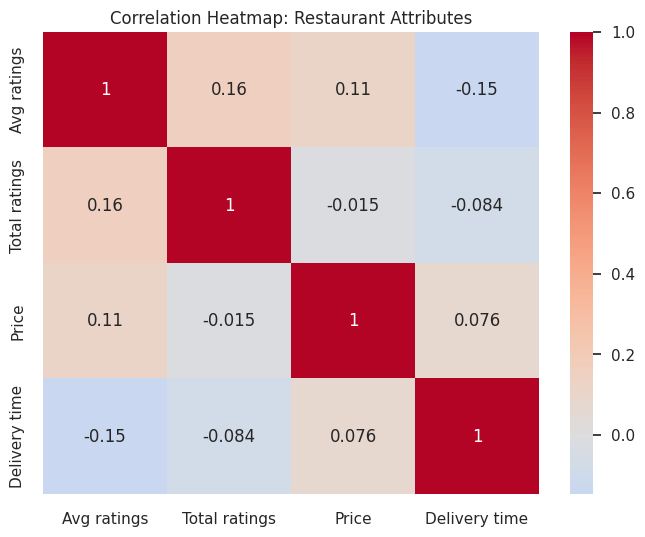

In [ ]:
correlation_matrix = df[columns_to_compare].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Restaurant Attributes')
plt.show()


Study how the type of food offered impacts customer choices.


# Create a bar plot to study how the type of food offered impacts customer choices

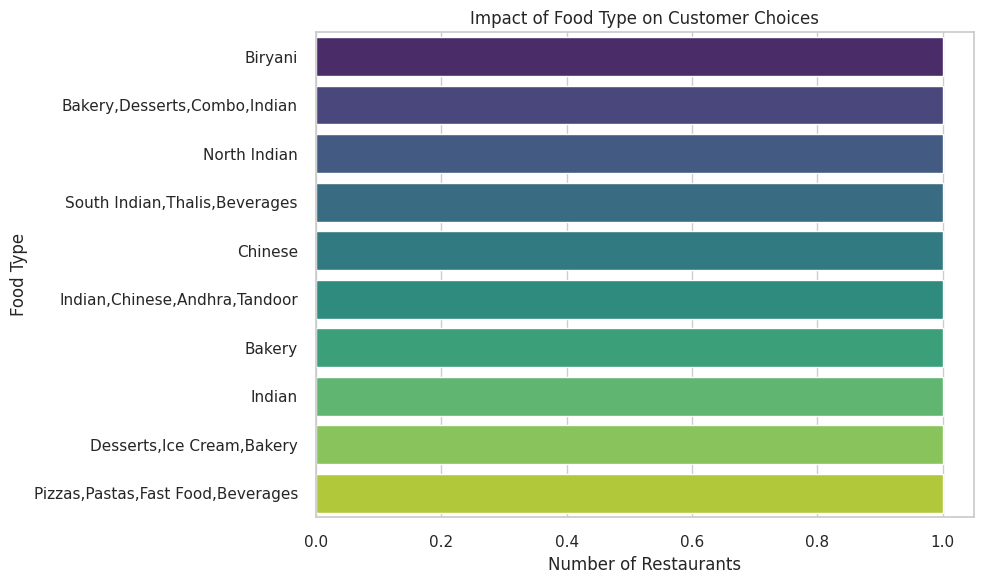

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, y='Food type', order=df1['Food type'].value_counts().index, palette='viridis')
plt.title('Impact of Food Type on Customer Choices')
plt.xlabel('Number of Restaurants')
plt.ylabel('Food Type')
plt.tight_layout()
plt.show()


# Calculate the distribution of food types

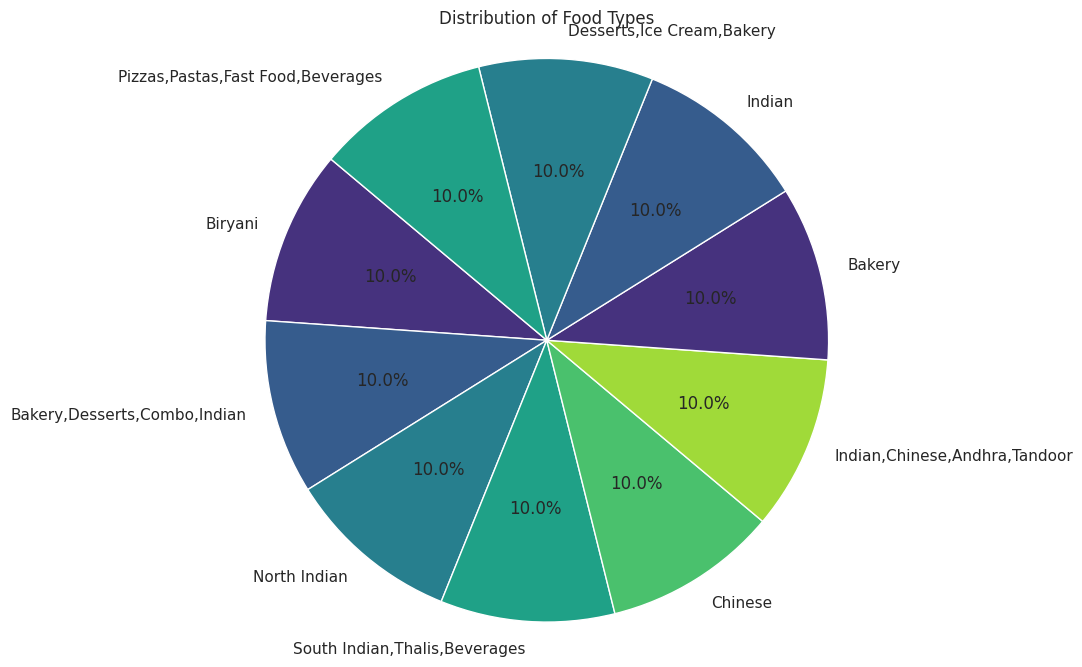

In [ ]:

food_type_distribution = df1['Food type'].value_counts()

# Create a pie chart to visualize the distribution of food types
plt.figure(figsize=(8, 8))
plt.pie(food_type_distribution, labels=food_type_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Food Types')
plt.axis('equal')
plt.show()


Count Plot of Food Type by City:

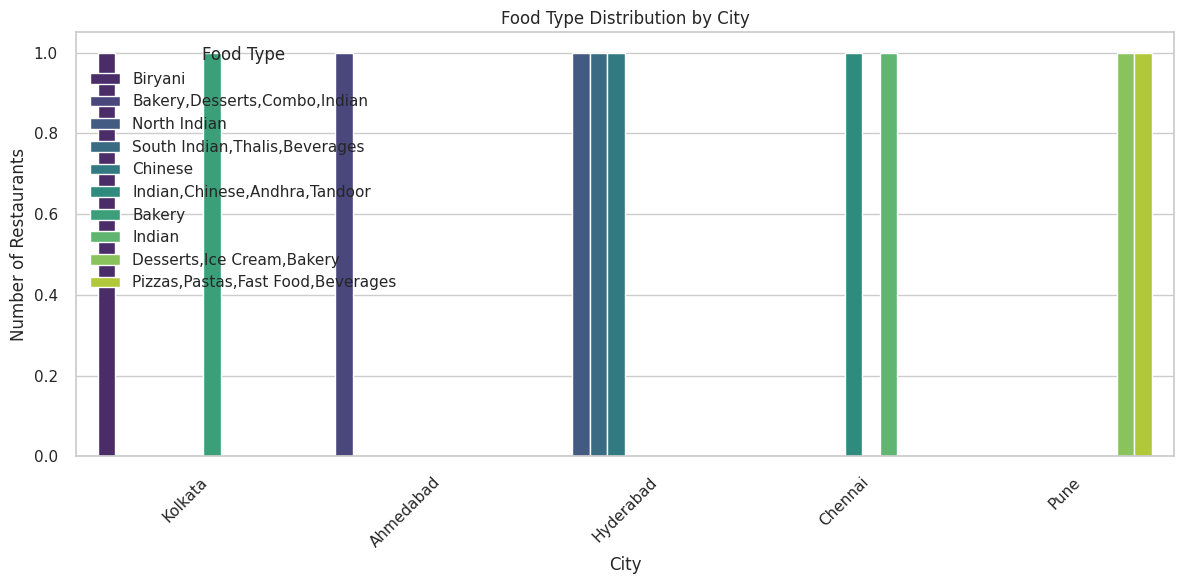

In [ ]:
# Create a count plot to study the distribution of food types across cities
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='City', hue='Food type', palette='viridis')
plt.xticks(rotation=45)
plt.title('Food Type Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.legend(title='Food Type')
plt.show()


These visualizations will help you gain insights into how the type of food offered impacts customer choices and how food preferences vary across different attributes

Use data visualization to present insights on restaurant attributes and preferences

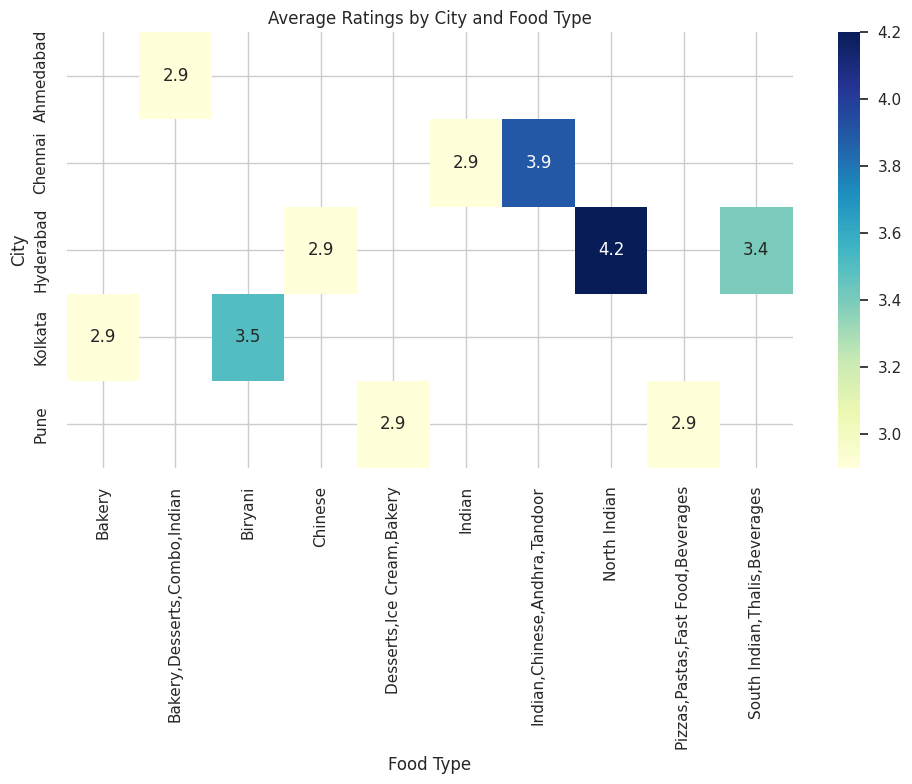

In [ ]:


# Create a pivot table for average ratings and food types
pivot_table = df1.pivot_table(values='Avg ratings', index='City', columns='Food type')

# Create a heatmap to visualize average ratings by city and food type
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Ratings by City and Food Type')
plt.xlabel('Food Type')
plt.ylabel('City')
plt.tight_layout()
plt.show()


modle

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
df['Popularity'] = df['Avg ratings'] * df['Total ratings']
features = ['Avg ratings', 'Total ratings', 'Price', 'Delivery time']
X = df[features]
y = df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize a linear regression model
linear_model = LinearRegression()
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 7426.19


Mean Squared Error: 742.86


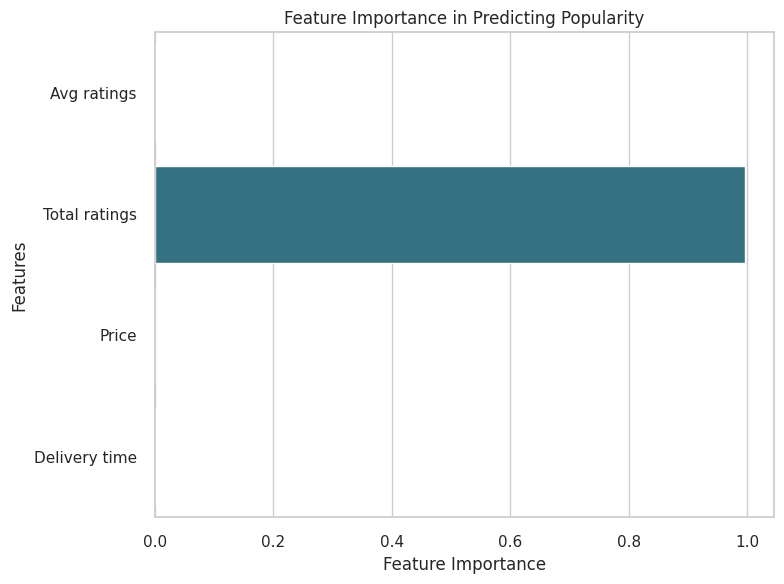

In [ ]:
# Initialize a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Feature Importance Analysis
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.title('Feature Importance in Predicting Popularity')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df['Popularity'] = df['Avg ratings'] * df['Total ratings']

features = ['Avg ratings', 'Total ratings', 'Price', 'Delivery time']

X = df[features]
y = df['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Print evaluation metrics
print("Linear Regression:")
print(f"MSE: {linear_mse:.2f}")
print(f"RMSE: {linear_rmse:.2f}")
print(f"MAE: {linear_mae:.2f}")
print(f"R-squared: {linear_r2:.2f}")
print()

print("Random Forest Regression:")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R-squared: {rf_r2:.2f}")
print()

print("Decision Tree Regression:")
print(f"MSE: {dt_mse:.2f}")
print(f"RMSE: {dt_rmse:.2f}")
print(f"MAE: {dt_mae:.2f}")
print(f"R-squared: {dt_r2:.2f}")
print()
